# About The Company
Bellabeat, a smart device manufacture company especially designed for woman. Bellabeat is a successfull small company in smart device segments.Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.
   We will move further step by step. There are total 5 steps. Ask, Prepare, Process, Analysis And Share. So, at First we will interpret what is business task or what is the problem we are going to solve.
#  ASK PHASE 
Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. Identify tends in how consumers use non-Bellabet smart devices to apply insights into Bellabeat marketing strategy.She then wants you to select one Bellabeat product to apply these insights to in your presentation.
  
**Stakeholder's**
  
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team

# PREPARE PHASE
  Now, first we gather Fitbit Fitbase Tracker Data and load packages and libraries.

In [1]:
install.packages("tidyverse")
install.packages("lubridate")
install.packages("skimr")
install.packages("janitor")
install.packages("ggplot2")
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(skimr)
library(janitor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘timechange’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘skimr’ is not available for this version of R
‘skimr’ version 2.2.1 is in the repositories but depends on R (>= 4.1.0)

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplot2’ is not available for this version of R
‘ggplot2’ version 4.0.0 is in the repositories but depends on R (>= 4.1)

A version of this package for your version of R might be availabl

In [2]:
daily_activity <- read_csv(file = "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv") 
daily_calories <- read_csv(file = "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv") 
intensities <- read_csv(file = "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv") 
daily_steps <- read_csv(file = "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv") 
sleepday <- read_csv(file = "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv") 
weight <- read_csv(file = "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types

In [3]:
head(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [4]:
head(daily_calories)

Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


In [5]:
head(intensities)

Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


In [6]:
head(daily_steps)

Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


In [7]:
head(sleepday)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


In [8]:
head(weight)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


# PROCESS PHASE
We will check for errors in datasets and transform data.

In [9]:
glimpse(daily_activity)
glimpse(daily_calories)
glimpse(intensities)
glimpse(daily_steps)
glimpse(sleepday)
glimpse(weight)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

The date and time column are merged. So, we need to separate them

In [10]:
#separating date and time column
intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y")
intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")


sleepday$SleepDay=as.POSIXct(sleepday$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleepday$date <- format(sleepday$SleepDay, format = "%m/%d/%y")
sleepday$time <- format(sleepday$SleepDay, format = "%H:%M:%S")

head(intensities)
head(sleepday)

Id,ActivityHour,TotalIntensity,AverageIntensity,date,time
<dbl>,<dttm>,<dbl>,<dbl>,<chr>,<chr>
1503960366,2016-04-12 00:00:00,20,0.333333,04/12/16,00:00:00
1503960366,2016-04-12 01:00:00,8,0.133333,04/12/16,01:00:00
1503960366,2016-04-12 02:00:00,7,0.116667,04/12/16,02:00:00
1503960366,2016-04-12 03:00:00,0,0.000000,04/12/16,03:00:00
1503960366,2016-04-12 04:00:00,0,0.000000,04/12/16,04:00:00
1503960366,2016-04-12 05:00:00,0,0.000000,04/12/16,05:00:00


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date,time
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1503960366,2016-04-12,1,327,346,04/12/16,00:00:00
1503960366,2016-04-13,2,384,407,04/13/16,00:00:00
1503960366,2016-04-15,1,412,442,04/15/16,00:00:00
1503960366,2016-04-16,2,340,367,04/16/16,00:00:00
1503960366,2016-04-17,1,700,712,04/17/16,00:00:00
1503960366,2016-04-19,1,304,320,04/19/16,00:00:00


Now we check for any duplicates

In [11]:
sum(duplicated(daily_activity))
sum(duplicated(sleepday))
sum(duplicated(daily_steps))
sum(duplicated(intensities))
sum(duplicated(daily_calories))
sum(duplicated(weight))

[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

[1] 0

There are 3 duplicates in sleepday dataset

In [12]:
sleepday <- sleepday %>%
  distinct() %>%
  drop_na()
sum(duplicated(sleepday))

[1] 0

Now, our data is cleaned and tranformed. We checked for duplicate, data formats, timestamps.

# ANALYSIS PHASE
We cleaned the dataset and now we can start our analysis phase

In [13]:
length(unique(daily_activity$Id))
length(unique(daily_calories$Id))
length(unique(intensities$Id))
length(unique(daily_steps$Id))
length(unique(sleepday$Id))
length(unique(weight$Id))

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

There are intotal 33 participants. But in sleepday participants are 24 and for weightlog dataset there are only 8 participants which concludes data is insufficiant which leads to biased recommendations and conclusions.

In [14]:
#activity
daily_activity %>%
 select(TotalSteps, TotalDistance, SedentaryMinutes, Calories) %>%
summary()
#num of active minute per category 
daily_activity %>%
select (VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes)%>%
summary()
#calories
daily_calories %>%
select(Calories)%>%
summary()
#intensities
intensities %>%
select(TotalIntensity, AverageIntensity)%>%
summary()
#steps
daily_steps %>%
select(StepTotal)%>%
summary()
#sleep
sleepday %>%
select(TotalMinutesAsleep,TotalTimeInBed)%>%
summary()
#weight
weight %>%
select(WeightKg, BMI)%>%
summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    Calories   
 Min.   :   0  
 1st Qu.:1828  
 Median :2134  
 Mean   :2304  
 3rd Qu.:2793  
 Max.   :4900  

 TotalIntensity   AverageIntensity
 Min.   :  0.00   Min.   :0.0000  
 1st Qu.:  0.00   1st Qu.:0.0000  
 Median :  3.00   Median :0.0500  
 Mean   : 12.04   Mean   :0.2006  
 3rd Qu.: 16.00   3rd Qu.:0.2667  
 Max.   :180.00   Max.   :3.0000  

   StepTotal    
 Min.   :    0  
 1st Qu.: 3790  
 Median : 7406  
 Mean   : 7638  
 3rd Qu.:10727  
 Max.   :36019  

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.8  
 Median :432.5      Median :463.0  
 Mean   :419.2      Mean   :458.5  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

From summary 
* average sedentary minutes are 991.2 or 16.52 hours which is higher than usual.
* The majority of the participants are lightly active
* According CDC or doctor recommendation daily total steps should be 10,000 steps or higher and participants average steps are 7638 which is slightly lesser.
* Total time in bed is higher than total minutes sleep in bed which concludes rest time is little bit higher.

In [15]:
summary(weight$IsManualReport)

   Mode   FALSE    TRUE 
logical      26      41 

There are 26 false manual reports so dataset of weight log is incorrectly recorded.

In [16]:
daily_activity <- daily_activity %>%
rename(date = ActivityDate)%>%
mutate(date = as_date(date, format = "%m/%d/%Y"))
head(daily_activity)

Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [17]:
sleepday <- subset(sleepday, select = -date)
head(sleepday)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,time
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,1,327,346,00:00:00
1503960366,2016-04-13,2,384,407,00:00:00
1503960366,2016-04-15,1,412,442,00:00:00
1503960366,2016-04-16,2,340,367,00:00:00
1503960366,2016-04-17,1,700,712,00:00:00
1503960366,2016-04-19,1,304,320,00:00:00


In [18]:
sleepday <- sleepday %>%
rename(date = SleepDay)
head(sleepday)

Id,date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,time
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,1,327,346,00:00:00
1503960366,2016-04-13,2,384,407,00:00:00
1503960366,2016-04-15,1,412,442,00:00:00
1503960366,2016-04-16,2,340,367,00:00:00
1503960366,2016-04-17,1,700,712,00:00:00
1503960366,2016-04-19,1,304,320,00:00:00


In [19]:
# merging datasets
daily_activity_merged <- daily_activity %>%
merge(sleepday, by = c("Id", "date"))
head(daily_activity_merged)

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,time
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346,00:00:00
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407,00:00:00
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442,00:00:00
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367,00:00:00
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712,00:00:00
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320,00:00:00


In [20]:
daily_average <- daily_activity_merged %>%
group_by(Id) %>%
summarise (mean_daily_steps = mean(TotalSteps), mean_daily_calories = mean(Calories), mean_daily_sleep = mean(TotalMinutesAsleep))
head(daily_average)

Id,mean_daily_steps,mean_daily_calories,mean_daily_sleep
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12405.680,1872.280,360.2800
1644430081,7967.750,2977.750,294.0000
1844505072,3477.000,1676.333,652.0000
1927972279,1490.000,2316.200,417.0000
2026352035,5618.679,1540.786,506.1786
2320127002,5079.000,1804.000,61.0000


In [21]:
active_type <- daily_average %>%
  mutate(active_type = case_when(
    mean_daily_steps < 5000 ~ "sedentary",
    mean_daily_steps >= 5000 & mean_daily_steps < 7499 ~ "lightly active", 
    mean_daily_steps >= 7500 & mean_daily_steps < 9999 ~ "fairly active", 
    mean_daily_steps >= 10000 ~ "very active"
  ))

head(active_type)

Id,mean_daily_steps,mean_daily_calories,mean_daily_sleep,active_type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12405.680,1872.280,360.2800,very active
1644430081,7967.750,2977.750,294.0000,fairly active
1844505072,3477.000,1676.333,652.0000,sedentary
1927972279,1490.000,2316.200,417.0000,sedentary
2026352035,5618.679,1540.786,506.1786,lightly active
2320127002,5079.000,1804.000,61.0000,lightly active


In [22]:
calories <- daily_activity %>%
group_by(Id)%>%
summarise(total_calories = sum(Calories))
head(calories)

Id,total_calories
<dbl>,<dbl>
1503960366,56309
1624580081,45984
1644430081,84339
1844505072,48778
1927972279,67357
2022484408,77809


As per doctors recommendation monthly calories should be burned **60,000** to **75,000**
Calories burned are depends upon person various factors like Sex, Age, Weight, Height and lifestyle.
From above table monthly calories **lesser than usual** are burned is observed. **Bellabeat app can notify them to do more activity
so they can burn more calories to achieve monthly goal. Bellabeta App can notify them on daily basis and monthly basis.**

# SHARE PHASE
The last phase of our case study is visualization phase.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


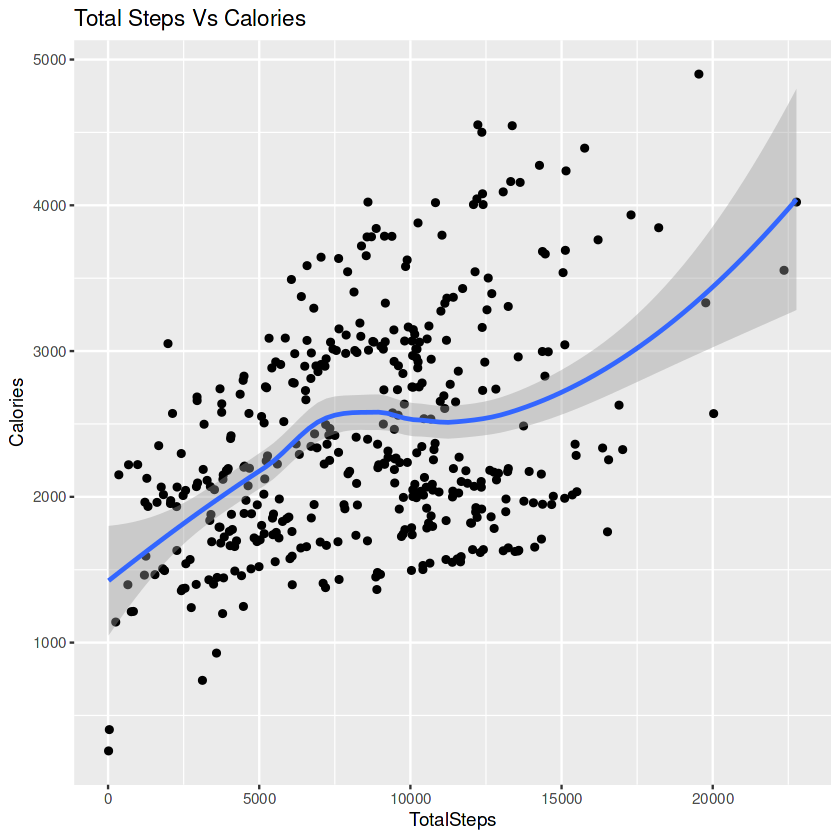

In [23]:
ggplot(data = daily_activity_merged) +
geom_point(mapping = aes(x = TotalSteps, y = Calories)) + 
geom_smooth (mapping = aes(x = TotalSteps, y = Calories)) +
labs(title = "Total Steps Vs Calories")

I can see there is a **positive co-relation** between total steps and calories which means more the steps more calories will burn.
According to doctors on an average **1600 to 2200** calories should be burn daily for women. **Bellabeat app can recommend complete daily goal at least 9000 to 10,000 steps to burn adequate amount of calories.**
Now, let's check at what time participant is most active

In [24]:
int_new <- intensities %>%
group_by(time) %>%
drop_na() %>%
summarise(mean_total_int = mean(TotalIntensity))
head(int_new)

time,mean_total_int
<chr>,<dbl>
00:00:00,2.1295503
01:00:00,1.4190782
02:00:00,1.0439443
03:00:00,0.4437299
04:00:00,0.6330472
05:00:00,4.9506438


In [25]:
intensities <- subset(intensities, select = -ActivityHour)
head(intensities)

Id,TotalIntensity,AverageIntensity,date,time
<dbl>,<dbl>,<dbl>,<chr>,<chr>
1503960366,20,0.333333,04/12/16,00:00:00
1503960366,8,0.133333,04/12/16,01:00:00
1503960366,7,0.116667,04/12/16,02:00:00
1503960366,0,0.000000,04/12/16,03:00:00
1503960366,0,0.000000,04/12/16,04:00:00
1503960366,0,0.000000,04/12/16,05:00:00


In [26]:
intensities <- intensities %>%
group_by(Id) %>%
drop_na()%>%
summarise(mean_total_int = mean(TotalIntensity)) %>%
mutate(intense_type = case_when (
    mean_total_int < 5 ~ "Sedentary",
    mean_total_int >= 5 & mean_total_int < 10 ~ "Lightly intense", 
    mean_total_int >= 10 & mean_total_int < 15 ~ "Fairly intense", 
    mean_total_int >= 15 ~ "Highly Intense"
  ))
head(intensities)

Id,mean_total_int,intense_type
<dbl>,<dbl>,<chr>
1503960366,16.170153,Highly Intense
1624580081,8.039402,Lightly intense
1644430081,10.519774,Fairly intense
1844505072,5.021888,Lightly intense
1927972279,1.857337,Sedentary
2022484408,17.031250,Highly Intense


Warning message in geom_histogram(stat = "identity", fill = "darkgreen"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


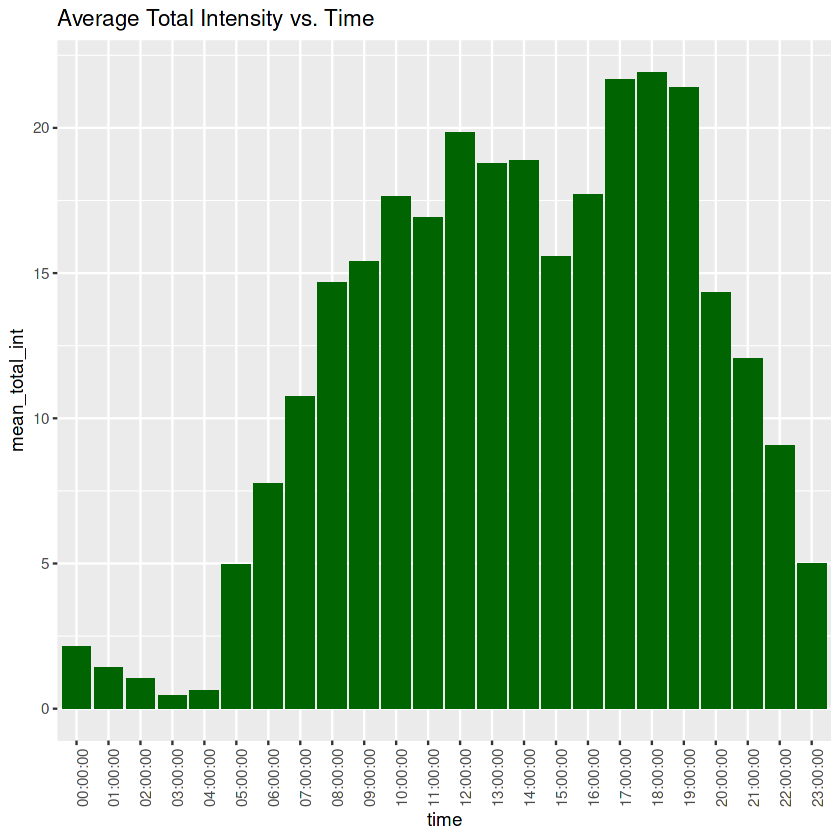

In [27]:
ggplot(data = int_new, aes(x = time, y = mean_total_int)) + 
geom_histogram(stat = "identity", fill = 'darkgreen') +
theme(axis.text.x = element_text(angle = 90)) +
labs(title = "Average Total Intensity vs. Time")

From above graph participants are active during 5 am to 10 pm.
The participants are **mostly active** during **5 pm** to **10 pm**. I think
they prefer to go gym or for jogging after office work.
**Bellabeat app can use this time to remind and motivate them to do excersize.**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


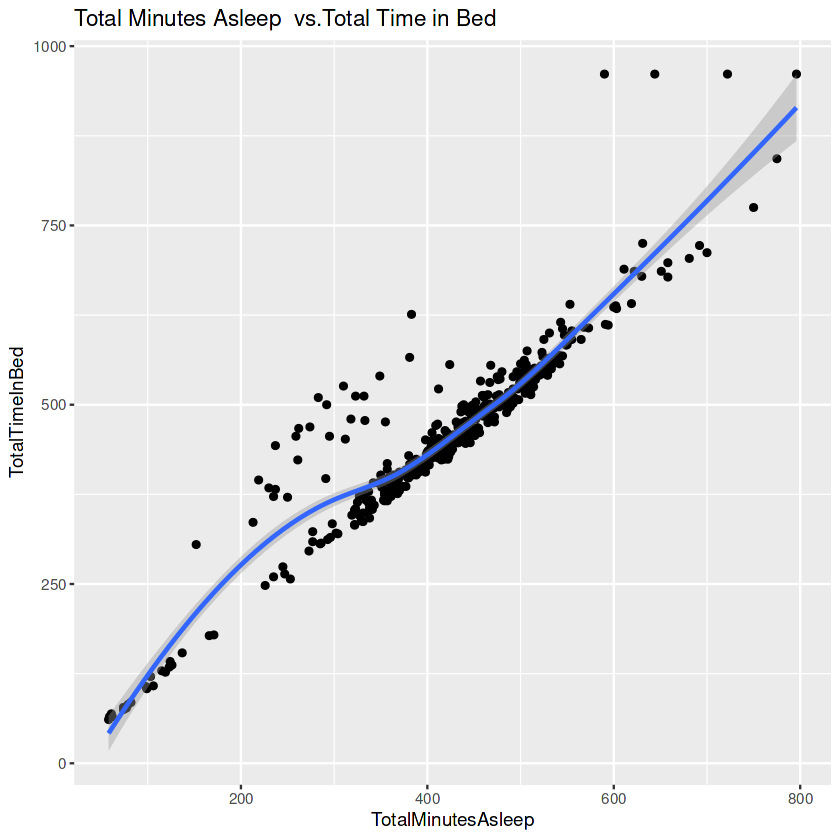

In [28]:
ggplot(data = sleepday) +
geom_point (mapping = aes(x = TotalMinutesAsleep, y = TotalTimeInBed)) + 
geom_smooth(mapping = aes(x = TotalMinutesAsleep, y = TotalTimeInBed)) + 
labs(title = "Total Minutes Asleep  vs.Total Time in Bed")

The relationship between Total Minutes Asleep and Total Time in Bed looks **linear**. So if the Bellabeat users want to improve their sleep, we should consider using notification to go to sleep.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


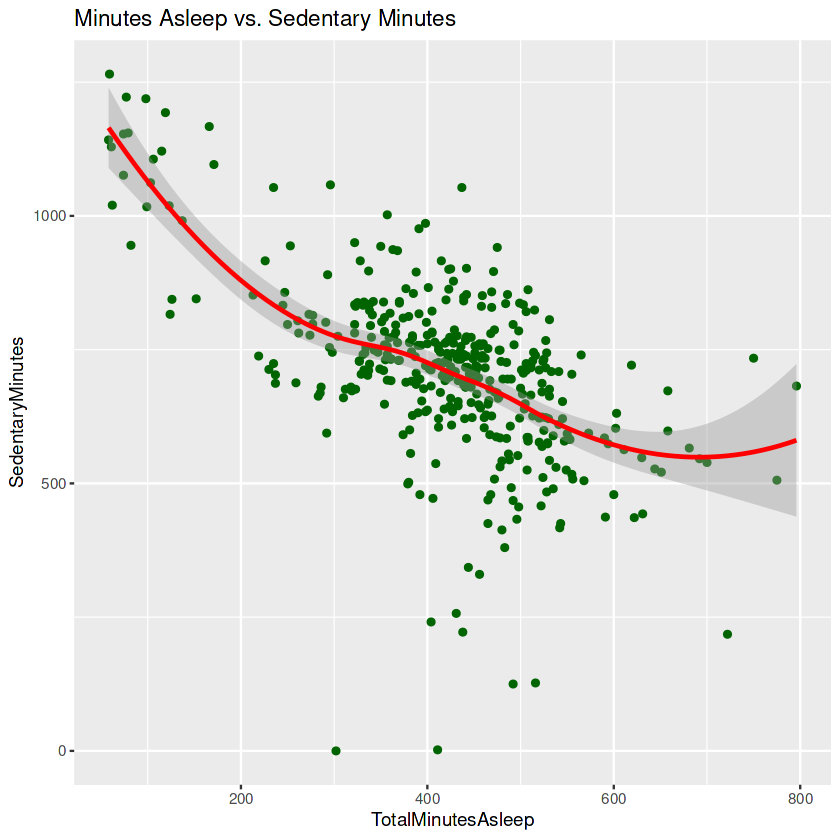

In [29]:
ggplot(data = daily_activity_merged, aes(x = TotalMinutesAsleep, y = SedentaryMinutes)) + 
geom_point(color = 'darkgreen') + geom_smooth(color = 'red') +
labs(title="Minutes Asleep vs. Sedentary Minutes")

# Summerizing Data and Meaningful Insights
As we know Bellabeat company founded in 2013 and it has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. Bellabeat company especially designed for women and founder goal is to connect and improve women health through technology.Some type of diseases   are more prone to women then men. So, Urška Sršen want to monitor and improve health through smart devices. Here I found some meaningful insight's
to achive goal and enhance company credibility.
1. If the Bellabeat users want to improve their sleep, we should consider using notification to go to sleep.
2. According CDC or doctor recommendation daily total steps should be 10,000 steps or higher and participants average steps are 7638 which is slightly lesser. Bellabeat app can notify users about total daily steps and suggest daily steps according to user goal.
3. Bellabeat app can recommend complete daily goal at least 9000 to 10,000 steps to burn adequate amount of calories.
4. If users want to lose weight, it’s probably a good idea to control daily calorie consumption. Bellabeat can suggest some ideas for low-calorie diet or consult health experts through 24*7 customer care service.
5. If users want to improve their sleep, Bellabeat app should give notifications to go to bed.
6. The participants are mostly active during 5 pm to 10 pm. I thing they prefer to go gym or for jogging after office work. Bellabeat app can use this time to remind and motivate them to do excersize.
 Bellabeat company only focused on women's. The company should also focused on men. Company should run some campign about health related and encourage people to use bellabeat smart devices for one stop solution for health.  

**Thank you** for your interest to my Bellabeat Case Study :)

This is my **first project using R**. I would appreciate any comments and recommendations for improvement!